# PETE/NUEN 689 - MOR - Fall 2023

#  Introduction to PDE's discetizations - Part 3
## PDE's by Finite Differences Discretiztions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags, diags

Solving the PDE

((del p/ del t) = K*(del^2 p)/(dx^2 );  

0<x<L;  0<=t <= 0.1
K = 1
BC: p(o, t) = 0; p(1, t) = 0 
IC: p(x, 0) = sin(pi * x)

In [4]:
# PDE Setup
Ntime  = 1000
Nspace  = 50  # If Nspace = 100 --> unstable - check!

xspan = np.array([0., 1.0])
tspan = np.array([0., 0.1])
bv = np.array([0,0])
K = 1


In [5]:
# Check the stability conditions
dt = (tspan[1]-tspan[0])/(Ntime)
h = (xspan[1]-xspan[0])/(Nspace+1)
lam = K*dt/(h**2)

if lam <= 1/2:
    print('stable system')
else:
    print('change h and dt --> unstable system')

stable system


In [6]:
# Exact Solution
p_true = lambda t, x:  np.sin(np.pi*x)*np.exp(-np.pi**2*t)

# PDE SOLVERS

## Explict

In [10]:
def my_PDE_solver_explict(xspan, bv, tspan,  Nspace, Ntime,  K):
    
    # Ntime  = 10
    # Nspace  = 10
    # xspan = np.array([0., 1.0])
    # tspan = np.array([0., 0.1])
    dt = (tspan[1]-tspan[0])/(Ntime)
    h = (xspan[1]-xspan[0])/(Nspace+1)
    lam = K*dt/(h**2)
    x = np.linspace(xspan[0], xspan[1], Nspace+2)
    t = np.linspace(tspan[0], tspan[1], Ntime+1)  
    p = np.zeros((Nspace+2, Ntime +1 ))
        
    # Set Initial conditions
    for i in range(Nspace+2):
        p[i,0] = np.sin(np.pi*x[i])    

    # Set Boundary conditions
    for n in range(Ntime+1):
        p[0,n]= bv[0]
        p[-1,n]= bv[1]
            
    # Start time loop
    for n in range(1,Ntime+1):
        for i  in range(1, Nspace  + 1):
            #display(i)
            p[i, n] = p[i, n-1] + lam*(p[i+1, n-1] - 2*p[i, n-1] + p[i-1, n-1])
    return p, t, x

In [13]:
p_Exp, t, x = my_PDE_solver_explict(xspan, bv , tspan,  Nspace, Ntime,  K)

## Explict - Using matrix multiply

In [16]:
def my_PDE_solver_mat(xspan, bv, tspan,  Nspace, Ntime,  K):
    
    dt = (tspan[1]-tspan[0])/(Ntime)
    h = (xspan[1]-xspan[0])/(Nspace+1)
    lam = K*dt/(h**2)
    x = np.linspace(xspan[0], xspan[1], Nspace+2)
    t = np.linspace(tspan[0], tspan[1], Ntime+1)  
    p = np.zeros((Nspace+2, Ntime +1 ))
        
    # Set Initial conditions
    for i in range(Nspace+2):
        p[i,0] = np.sin(np.pi*x[i])    

    # Set Boundary conditions
    for n in range(Ntime+1):
        p[0,n]= bv[0]
        p[-1,n]= bv[1]
        
        
    # Matrix A is constant and can be formed outside of the time loop.
    A = np.zeros((Nspace+ 2, Nspace+ 2))    
    A1 = diags([lam,  (-2*lam) , lam], [-1, 0, 1], shape=(Nspace, Nspace)).toarray()
    A[0,0]  =1
    A[-1, -1] = 1
    A[1, 0 ] = lam
    A[Nspace , -1] = lam
    A[1:Nspace+1, 1:Nspace+ 1] =A1
    
    # Start time loop
    for n in range(1, Ntime+1):
        p[:,n] = p[:, n-1] + A@p[:, n-1]   
        
        
    return  p, t, x

In [17]:
p_Exp2, t2, x2 = my_PDE_solver_mat(xspan, bv , tspan,  Nspace, Ntime,  K)

## Implicit 

In [14]:
def my_PDE_solver_Implicit(xspan, bv, tspan,  Nspace, Ntime,  K):
 
    dt = (tspan[1]-tspan[0])/(Ntime)
    h = (xspan[1]-xspan[0])/(Nspace+1)
    lam = K*dt/(h**2)
    x = np.linspace(xspan[0], xspan[1], Nspace+2)
    t = np.linspace(tspan[0], tspan[1], Ntime+1)  
    p = np.zeros((Nspace+2, Ntime +1 ))
    b = np.zeros(Nspace)
    
    # Set Initial conditions
    for i in range(Nspace+2):
        p[i,0] = np.sin(np.pi*x[i])    

    # Set Boundary conditions
    for n in range(Ntime+1):
        p[0,n]= bv[0]
        p[-1,n]= bv[1]
        
    # Matrix A is constant and can be formed outside of the time loop.
        
    A = diags([-lam,  (1+2*lam) , -lam], [-1, 0, 1], shape=(Nspace, Nspace)).toarray()
    
    # Start time loop
    for n in range(1, Ntime + 1):
        b = p[1:-1, n-1]
        b[0] = b[0] + lam*p[0,n-1]
        b[-1] = b[-1] + lam*p[-1, n-1]
        p[1:-1, n] = np.linalg.solve(A, b)
    return  p, t, x



In [15]:
p_Imp, t3, x3 = my_PDE_solver_Implicit(xspan, bv , tspan,  Nspace, Ntime,  K)

## Results

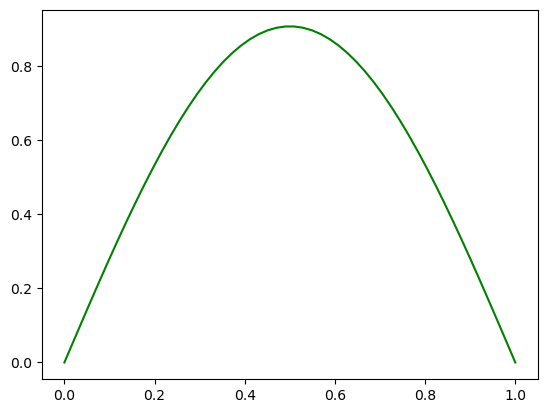

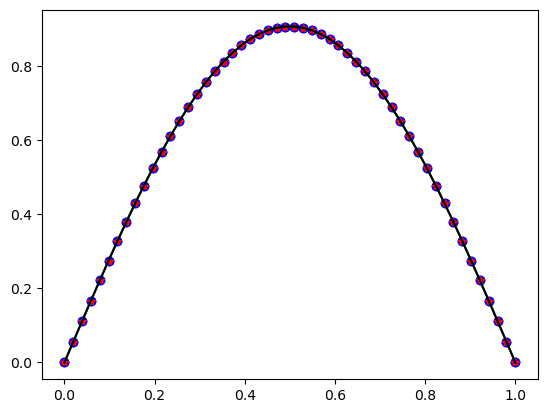

In [18]:
# Let's plot a single time step first as a fucntion of space to check if they all match with the true solution
plt.figure()
ti = 100
plt.plot( x, p_Imp[:,ti], 'g-')
plt.figure()
plt.plot(x, p_Exp[:,ti], 'bo')
plt.plot(x, p_Exp[:,ti], 'bo',   x, p_Exp2[:,ti], 'r*', x, p_Imp[:,ti], 'g-', x, p_true(t[ti], x), 'k')

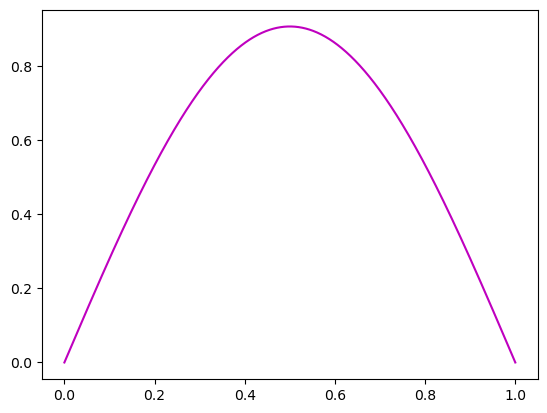

In [20]:
# Reffine True value
x1 = np.linspace(xspan[0], xspan[1], 1000)
plt.plot(x1, p_true(t[ti], x1), 'm')

Text(0.5, 0, 'Space')

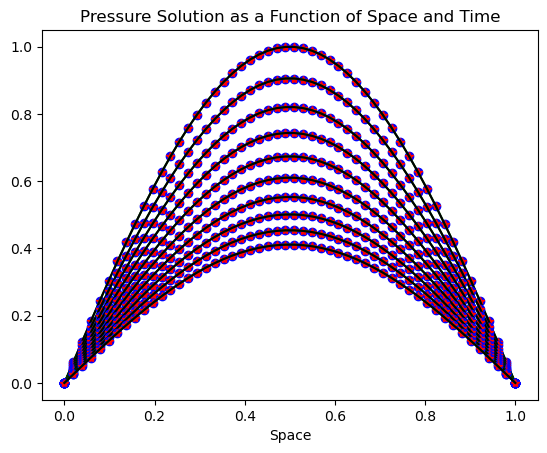

In [21]:
# Now, let's generate a time plot - for some times
plt.figure()
for i in range(0, Ntime, 100):
    plt.plot(x, p_Exp[:,i], 'bo',   x, p_Exp2[:,i], 'r*', x, p_Imp[:,i], 'g-', x, p_true(t[i], x), 'k')
plt.title('Pressure Solution as a Function of Space and Time')
plt.xlabel('Space')

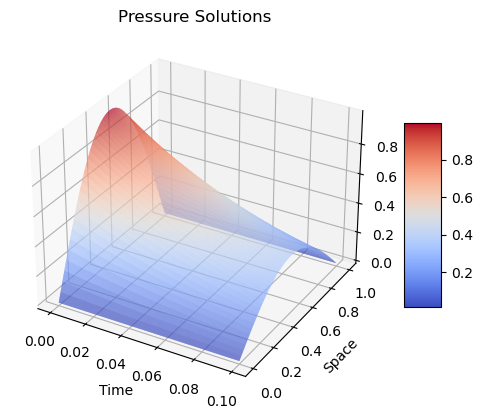

In [22]:
# Now, let's plot Surface all times in a surface -- see projection onto the "back wall" is represents the previous plots
from mpl_toolkits.mplot3d import Axes3D
T, X = np.meshgrid(t, x)

# Create a 3D figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(T, X, p_Exp, cmap='coolwarm', rstride=1, cstride=1)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('Pressure')
ax.set_title('Pressure Solutions')

# Add a colorbar legend
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()